In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn import datasets
# List of dataset names available in scikit-learn
dataset_names = [name for name in dir(datasets) if name.startswith('load_')]
# Remove the 'load_' prefix to get the actual dataset names
dataset_names = [name[5:] for name in dataset_names]
print(dataset_names)

['breast_cancer', 'diabetes', 'digits', 'files', 'iris', 'linnerud', 'sample_image', 'sample_images', 'svmlight_file', 'svmlight_files', 'wine']


In [ ]:
digit = datasets.load_digits() # Returns a Sklearn's bunch object
type(digit)

sklearn.utils._bunch.Bunch

In [ ]:
digit.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [ ]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
df = pd.DataFrame(digit.data, columns=digit.feature_names)
df['target'] = digit.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [ ]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [ ]:
df['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [ ]:
x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
len(x_train), len(x_test), len(y_train), len(y_test)

(1437, 360, 1437, 360)

In [ ]:
model = LogisticRegression(multi_class = 'multinomial', solver= 'sag', max_iter = 1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag')

In [ ]:
print('Model Coefficient:\n', model.coef_)

Model Coefficient:
 [[ 0.00000000e+00 -1.33286736e-04 -4.80298542e-02  7.90977675e-02
   5.36462891e-02 -8.15179214e-02 -1.08274073e-01 -1.04674227e-02
  -1.67403353e-05 -4.11318142e-02 -1.72974167e-03  1.57545017e-01
   6.74179455e-02  1.05913215e-01 -4.79830128e-02 -1.22473127e-02
  -4.65392318e-08  5.35663499e-02  1.25455773e-01 -3.16845120e-02
  -3.09357645e-01  1.68171201e-01  7.73673731e-02 -3.44300972e-03
  -5.13485897e-08  1.43347706e-01  6.76928424e-02 -1.80060975e-01
  -4.58264583e-01  3.27665807e-02  7.17492402e-02 -1.05284726e-04
   0.00000000e+00  1.55976756e-01  9.99454485e-02 -1.86475851e-01
  -3.86319451e-01  5.11662500e-02  3.92155334e-02  0.00000000e+00
  -4.76473374e-04 -3.63531223e-02  2.42193982e-01 -1.20881697e-01
  -1.44485692e-01  1.02175297e-01  4.98401238e-02 -7.35054286e-04
  -1.03822222e-03 -1.08537106e-01  6.69344002e-02  1.90140101e-02
   1.44364682e-01  4.77728104e-02 -2.32383489e-02 -1.08313527e-02
  -9.44764341e-06 -4.67134924e-03 -6.67811014e-02  1.760

In [ ]:
print('Model Intercept:\n', model.intercept_)

Model Intercept:
 [ 0.00308526 -0.06811751  0.00082156  0.00473411  0.05392174  0.00234866
 -0.00379354  0.01862739  0.0322866  -0.04391426]


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([3, 1, 9, 0, 5, 9, 1, 0, 6, 1, 9, 9, 7, 9, 6, 0, 6, 5, 3, 4, 6, 4,
       9, 0, 2, 5, 8, 3, 5, 2, 5, 4, 7, 1, 4, 8, 0, 6, 3, 9, 5, 3, 5, 4,
       0, 0, 0, 2, 3, 7, 3, 6, 6, 7, 4, 3, 4, 5, 6, 1, 6, 1, 2, 4, 9, 9,
       4, 3, 7, 0, 1, 8, 4, 7, 7, 1, 8, 1, 2, 4, 3, 9, 8, 1, 1, 6, 6, 4,
       3, 1, 5, 7, 6, 9, 0, 8, 3, 7, 5, 9, 3, 7, 7, 7, 7, 8, 9, 8, 7, 1,
       3, 2, 4, 0, 7, 0, 8, 2, 4, 7, 8, 7, 1, 9, 2, 3, 5, 8, 5, 3, 9, 4,
       8, 5, 4, 0, 5, 1, 8, 2, 2, 4, 1, 2, 4, 4, 8, 4, 9, 8, 0, 9, 3, 2,
       5, 3, 2, 1, 9, 4, 5, 9, 2, 0, 7, 5, 7, 0, 5, 2, 6, 0, 3, 0, 7, 5,
       6, 0, 5, 6, 9, 3, 2, 4, 2, 5, 5, 5, 0, 5, 5, 3, 0, 7, 6, 9, 6, 3,
       3, 8, 9, 2, 8, 9, 8, 9, 3, 5, 1, 6, 3, 2, 9, 3, 2, 8, 8, 7, 9, 5,
       3, 0, 4, 1, 0, 8, 1, 0, 1, 1, 0, 5, 6, 2, 7, 0, 9, 1, 5, 4, 5, 6,
       4, 3, 2, 2, 0, 1, 2, 2, 1, 4, 6, 2, 0, 4, 0, 3, 2, 9, 6, 3, 1, 3,
       5, 8, 9, 3, 8, 6, 2, 4, 5, 1, 7, 8, 4, 8, 6, 1, 0, 3, 5, 0, 9, 5,
       7, 9, 4, 6, 1, 0, 5, 4, 6, 4, 3, 4, 4, 3, 8,

In [ ]:
y_pred = model.predict(x_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.97


In [ ]:
scores_array = cross_val_score(model, x, y, cv=5, scoring='accuracy')
scores_array

array([0.91944444, 0.86666667, 0.94428969, 0.93871866, 0.89693593])

In [ ]:
print(scores_array.mean())

0.9132110801609409


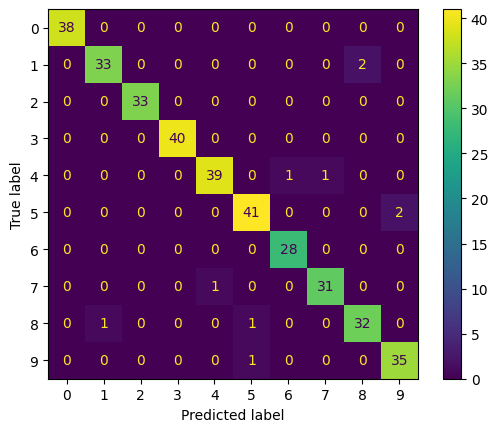

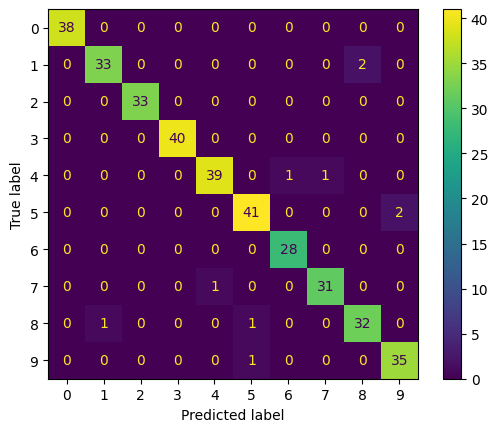

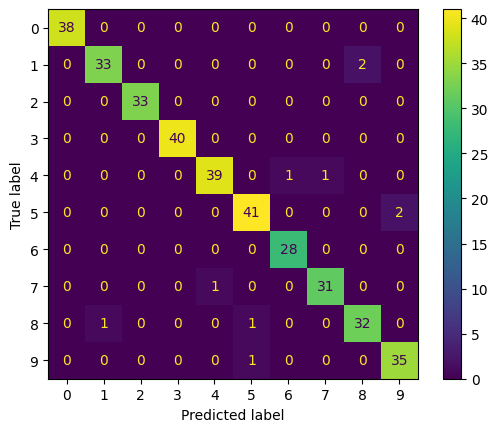

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot();
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test);

In [ ]:
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro Precision score: ", macro_precision)
print("Macro Recall score: ", macro_recall)
print("Macro F1 score: ", macro_f1)

Macro Precision score:  0.9720466265300634
Macro Recall score:  0.9729713719955745
Macro F1 score:  0.9724259794714574


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
%%writefile my_streamlit_app.py
import streamlit as st

st.title("My Streamlit App")
st.write("Hello, world!")


Writing my_streamlit_app.py


In [ ]:
!streamlit run my_streamlit_app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.123.161:8501

  Stopping...
^C
